# Rating regression analysis of winequality-white 
Winequality-white is a dataset consisting of 10 features and the quality. The features are the levels of chemical ingredients in the wine, which may influence the taste of the wine. Aiming of this exercise is to construct a model for quality regression analysis by deep learning methods. The tools I use are the most popular deep learning packages called Tensorflow (version 2.0) and API Keras. The importance of the feature is not the question I wanna discuss in this case. (Note, I've already analyzed dataset by some ensembling methods, which are the method that is easier to find the significant features. The result was the actually significant features are barely to find. Meaning, it seems the importance of each feature is approximately equal.)  

### Loading the packages

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  

### Loading the dataset 

In [3]:
wine = pd.read_csv('https://raw.githubusercontent.com/thisishugow/yhw/master/winequality-white.csv')
dataset=wine ##preventing the raw data from being destroyed

### Normalize the features and separating it into training and testing sets
Since the scale of the features are very different, I uses Z-scores to set the sdev to 1 and mean to 0. 

In [4]:
for i in np.arange(0,11):
    mean=np.mean(dataset.iloc[:,i])
    std=np.std(dataset.iloc[:,i], ddof=1)
    for m in np.arange(0, len(dataset)):
        z_score = (dataset.iloc[m,i]-mean)/std
        dataset.iloc[m,i] = z_score;
xtrain, xtest, ytrain, ytest = train_test_split(dataset.iloc[:,0:10], dataset.iloc[:,11].astype('float32'), 
                                                random_state=31, test_size=.3)                      

Function 'train_test_split' helps separating the original datatest into the training set and testing set with ratio 7:3. '.astype('float')' transfer the type of the column from str to float since Tensorflow computes with float. 

### Build the model

In [5]:
model = keras.models.Sequential()  #load Sequential(), which is the major method for constructing a model
model.add(keras.layers.Dense(16, activation = 'relu', input_shape=(10,)))
"""
input_shape is the dimension of the data which is necessary argument in the first layer.
'activation'set as 'relu'（Rectified Linear Unit, ReLU）which is widely applied in deep learning now, intead of Sigmoid.
The number of dense unit(set to be 8 here) is subjectively based on my personal experience with no reason.
"""
model.add(keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'))
model.add(keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001), activation = 'relu'))
model.add(keras.layers.Dense(1)) #Since this is a regression problem, the num of dense unit is one.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                176       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,265
Trainable params: 1,265
Non-trainable params: 0
_________________________________________________________________


##### *keras.regularizers.l2(): Regularizer
This is a method to avoid overfitting. The math detail here(https://en.wikipedia.org/wiki/Regularization_(mathematics))

In [6]:
# compiling the model.
model.compile(keras.optimizers.Adam(0.001),  ## learning rate
              loss= keras.losses.MeanSquaredError(),#
              metrics=[keras.metrics.MeanSquaredError()])
"""
Adam is the most popular optimizer and fits most problems.
"""

'\nAdam is the most popular optimizer and fits most problems.\n'

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:


* *Loss function* — An algorithm for measuring how far the model's outputs are from the desired output. The goal of training is this measures loss.
* *Optimizer* —An algorithm for adjusting the inner parameters of the model in order to minimize loss.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

Reference: "Basic classification: Classify images of clothing", https://www.tensorflow.org/tutorials/keras/classification

### Starting to train the model

In [7]:
import math
history = model.fit(xtrain, ytrain,
                    batch_size=32,
                    epochs=100,
                    steps_per_epoch=math.ceil(len(xtrain)/32))

Train on 3428 samples
Epoch 1/100
3428/3428 [==============================] - 1s 189us/sample - loss: 20.6199 - mean_squared_error: 20.5757
Epoch 2/100
3428/3428 [==============================] - 0s 72us/sample - loss: 3.2977 - mean_squared_error: 3.2520
Epoch 3/100
3428/3428 [==============================] - 0s 71us/sample - loss: 2.2559 - mean_squared_error: 2.2108
Epoch 4/100
3428/3428 [==============================] - 0s 68us/sample - loss: 1.6217 - mean_squared_error: 1.5769
Epoch 5/100
3428/3428 [==============================] - 0s 65us/sample - loss: 1.2211 - mean_squared_error: 1.1766
Epoch 6/100
3428/3428 [==============================] - 0s 63us/sample - loss: 0.9713 - mean_squared_error: 0.9272
Epoch 7/100
3428/3428 [==============================] - 0s 64us/sample - loss: 0.8053 - mean_squared_error: 0.7615
Epoch 8/100
3428/3428 [==============================] - 0s 95us/sample - loss: 0.7079 - mean_squared_error: 0.6646
Epoch 9/100
3428/3428 [========================

3428/3428 [==============================] - 0s 68us/sample - loss: 0.4525 - mean_squared_error: 0.4191
Epoch 71/100
3428/3428 [==============================] - 0s 59us/sample - loss: 0.4461 - mean_squared_error: 0.4127
Epoch 72/100
3428/3428 [==============================] - 0s 60us/sample - loss: 0.4476 - mean_squared_error: 0.4142
Epoch 73/100
3428/3428 [==============================] - 0s 64us/sample - loss: 0.4434 - mean_squared_error: 0.4100
Epoch 74/100
3428/3428 [==============================] - 0s 65us/sample - loss: 0.4504 - mean_squared_error: 0.4169
Epoch 75/100
3428/3428 [==============================] - 0s 67us/sample - loss: 0.4503 - mean_squared_error: 0.4169
Epoch 76/100
3428/3428 [==============================] - 0s 63us/sample - loss: 0.4441 - mean_squared_error: 0.4107
Epoch 77/100
3428/3428 [==============================] - 0s 63us/sample - loss: 0.4383 - mean_squared_error: 0.4048
Epoch 78/100
3428/3428 [==============================] - 0s 61us/sample - lo

### Ploting the loss and mse

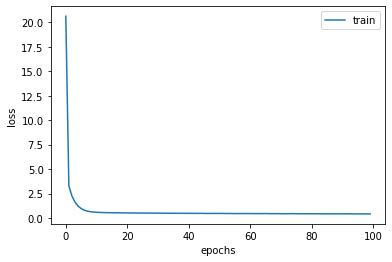

In [8]:

%matplotlib inline
import matplotlib.pylab as plt
plt.plot(history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper right')

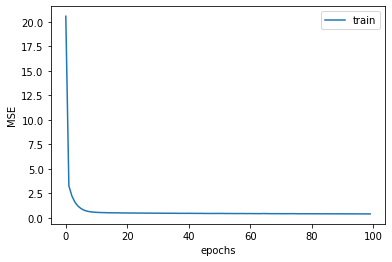

In [9]:
plt.plot(history.history['mean_squared_error'], label='train')
plt.xlabel('epochs')
plt.ylabel('MSE')
plt.legend(loc='upper right')

As the plots showed, the epoch may be 10~20 is enough.

### Validation

In [10]:
test_loss, test_mse = model.evaluate(x=xtest,y=ytest, steps=math.ceil(len(xtest)/32))
print('MSE on test dataset:', test_mse)

1470/1470 [==============================] - 0s 108us/sample - loss: 0.5176 - mean_squared_error: 0.4842
MSE on test dataset: 0.4842121


In [11]:
result=pd.DataFrame({'actual value':ytest})
result['prediction'] = model.predict(xtest).reshape(1470,1)  #the original shape of np.array is (1, 1470).
result

,actual value,prediction
827,9.0,6.478860
1083,6.0,6.400327
2495,5.0,6.099692
1655,5.0,5.429289
4403,5.0,5.662506
...,...,...
4189,5.0,5.964033
2280,6.0,5.707448
2633,5.0,5.925085
1035,6.0,5.734235
